<a href="https://colab.research.google.com/github/omwtbarca/Ezra/blob/main/MOOC-omwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
!pip install DALL-E
from dall_e          import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown

target_image_size = 256

def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def preprocess(img):
    s = min(img.size)
    
    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')
        
    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)

In [ ]:
# This can be changed to a GPU, e.g. 'cuda:0'.
dev = torch.device('cpu')

# For faster load times, download these files locally and use the local paths instead.
enc = load_model("https://cdn.openai.com/dall-e/encoder.pkl", dev)
dec = load_model("https://cdn.openai.com/dall-e/decoder.pkl", dev)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:405: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


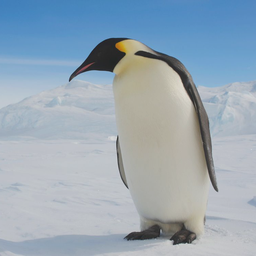

In [ ]:
x = preprocess(download_image('https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKIWgaiJUtss/v2/1000x-1.jpg'))
display_markdown('Original image:')
display(T.ToPILImage(mode='RGB')(x[0]))

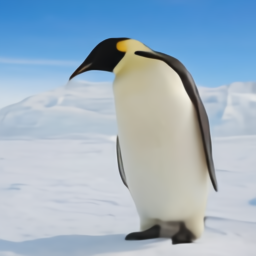

In [ ]:
import torch.nn.functional as F

z_logits = enc(x)
z = torch.argmax(z_logits, axis=1)
z = F.one_hot(z, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()

x_stats = dec(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
x_rec = T.ToPILImage(mode='RGB')(x_rec[0])

display_markdown('Reconstructed image:')
display(x_rec)

In [ ]:
#3.4 模块2  time库的使用
'''
功能：
    #1计算机时间的表达
    #2提供计时
    三类函数：
         时间获取：  time() ctime()  gmtime()
         时间格式化： strftime() 时间变串 strptime() 串变时间
         程序计时：sleep() perf_counter()
'''
import time 
#time.<b>()
t=time.gmtime()
print(t)
print('\n')
time.strftime("%B %b %A %a %Y-%m-%d %H:%M:%S %p",t)
'''
result:
time.struct_time(tm_year=2021, tm_mon=10, tm_mday=19, tm_hour=9, tm_min=47, tm_sec=21, tm_wday=1, tm_yday=292, tm_isdst=0)

2021-10-19 09:47:21    
'''
timeStr='2021-10-18 19:47:21'
ayer=timeStr
print("昨天时间：",ayer)
#第二种输入时间
#time.strptime(ayer de el ayer,)

#程序计时应用
#perf_counter  连续调用起始才有意义
start=time.perf_counter()
print(start)
#    sleep(s)    休眠
def wait():
     time.sleep(3)  #休眠30秒
wait()
end=time.perf_counter()
print(end)
timetaken=end-start
print(timetaken)

time.struct_time(tm_year=2021, tm_mon=10, tm_mday=19, tm_hour=10, tm_min=41, tm_sec=7, tm_wday=1, tm_yday=292, tm_isdst=0)


昨天时间： 2021-10-18 19:47:21
3739.653072458
3742.656383513
3.0033110549998128


In [ ]:
#   文本进度条
#sleep 打印函数
import time 
scale=10
print("------执行开始------")
for i in range(scale+1):
    a='*'*i
    b='.'*(scale-i)
    c=(i/scale)*100
    print("{:3.0f}%[{}->{}]".format(c,a,b))
    time.sleep(1)
print("------执行结束------")
#  what i wrote
import time
print("-----开始执行-----")
for i in range(11):
    a="*"*i
    b=(10-i)*"."
    print(i*10,"%","[",a,"->",b,"]")
    time.sleep(0.5)
print("-----执行结束-----")
import time
print("-----开始执行-----")
for i in range(11):
    a="*"*i
    b=(10-i)*"."
    print('\r',i*10,"%","[",a,"->",b,"]",end=' ')  #但单行刷新
    time.sleep(0.5)
print("-----执行结束-----")

------执行开始------
  0%[->..........]
 10%[*->.........]
 20%[**->........]
 30%[***->.......]
 40%[****->......]
 50%[*****->.....]
 60%[******->....]
 70%[*******->...]
 80%[********->..]
 90%[*********->.]
100%[**********->]
------执行结束------


In [ ]:
#   emoji
import emoji
result=emoji.emojize('thumb up')
print(result)
result=emoji.demojize(🎎)
print(result)



SyntaxError: ignored

In [ ]:
import time
scale=50
print("执行开始".center(scale//2,"-"))
start=time.perf_counter()
for i in range(scale+1):
    a='*'*i
    b='.'*(scale-i)
    c=(i/scale)*100
    dur=time.perf_counter()-start
    print("\r{:^3.0f}%[{}->{}]{:.2f}s".format(c,a,b,dur),end=' ')
    time.sleep(0.1)
print("\n"+"执行结束".center(scale//2,'-'))

-----------执行开始----------
100%[**************************************************->]5.02s 
-----------执行结束----------


In [ ]:
#文本进度条  beta version
import time
import math
scale=50
print("执行开始".center(scale//2,"-"))
start=time.perf_counter()
for i in range(scale+1):
    a='*'*i
    b='.'*(scale-i)
    c=(i/scale)*100
    c=(c+(1-c)*0.03)**2
    c=c/9415
    dur=time.perf_counter()-start
    print("\r{:^3.0f}%[{}->{}]{:.2f}s".format(c,a,b,dur),end=' ')
    time.sleep(0.1)
print("\n"+"执行结束".center(scale//2,'-'))

-----------执行开始----------
 1 %[**************************************************->]5.02s 
-----------执行结束----------


第四章   程序的控制结构
   单 二 多 分支结构
     顺序 循环 

In [ ]:
  guess=eval(input())
  if guess==9:
     print("nihao")
  else :
    print(" sanbi")

#二分支结构   紧凑形式   的if else   条件夹在中间，两边是判断后的表达式  
#不用输入：  不用注意缩进结构
guess=eval(input())
print("猜{}了".format("对" if guess==9 else "错")) 
# 多分支结构   if elif  elif else
# !=  不等于
''' x and y 
x or y
not x   逻辑取非
'''


In [ ]:
#程序的异常处理  try except
'''nameerror：ABC   异常类型：异常内容提示
'''
try:
  num =eval(input("huruzhnegshu"))
  print(num**2)
except:
  print(" budui")

huruzhnegshun
 budui


实例：身体质量指数BMI  BMI=体重Kg/身高平方m**2
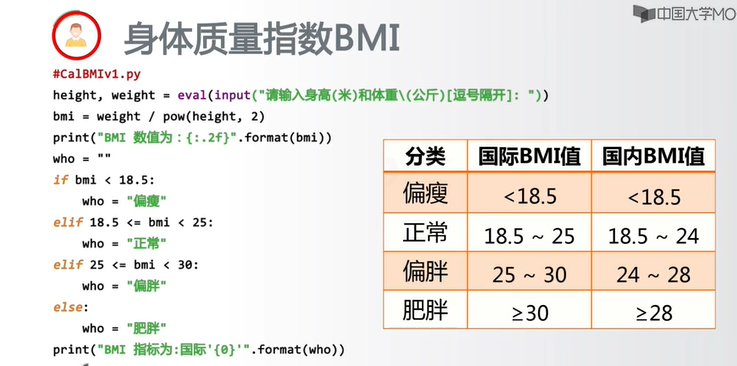


In [ ]:
# importing packages
from pytube import YouTube
import os
  
# url input from user
yt = YouTube(
    str(input("Enter the URL of the video you want to download: \n>> ")))
  
# extract only audio
video = yt.streams.filter(only_audio=True).first()
  
# check for destination to save file
print("Enter the destination (leave blank for current directory)")
destination = str(input(">> ")) or '.'
  
# download the file
out_file = video.download(output_path=destination)
  
# save the file
base, ext = os.path.splitext(out_file)
new_file = base + '.mp3'
os.rename(out_file, new_file)
  
# result of success
print(yt.title + " has been successfully downloaded.")

ModuleNotFoundError: ignored

In [ ]:
!pip install cartopy
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [40.713, -74.0135] # lat/lon of One World Trade Center in NYC
zoom = 0.00075 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
plt.show() # show the plot

Geometry must be a Point or LineString


ShapefileException: ignored

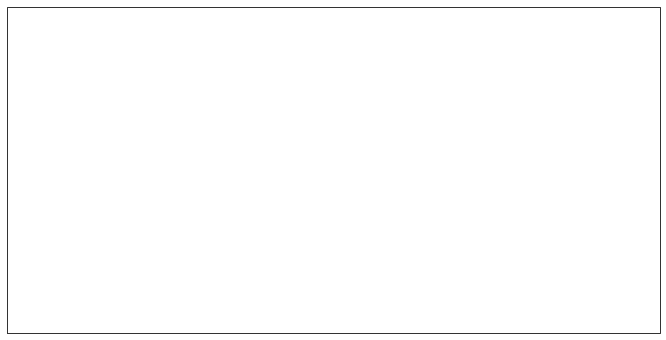

In [ ]:
!pip install cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.io.shapereader as shpreader

fig, ax = plt.subplots(figsize=(12,6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})

norm = mpl.colors.Normalize(vmin=0, vmax=1000000)
cmap = plt.cm.RdYlBu_r

for n, country in enumerate(shpreader.Reader(r"D:\Desk\KCL\courses\maps\中华人民共和国\中华人民共和国.shp").records()):

    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=cmap(norm(country.attributes['gdp_md_est'])),
                      label=country.attributes['name'])

ax.set_title('gdp_md_est')

cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label('gdp_md_est')